Initial shape: (7043, 21)
Final shape after encoding: (7032, 31)


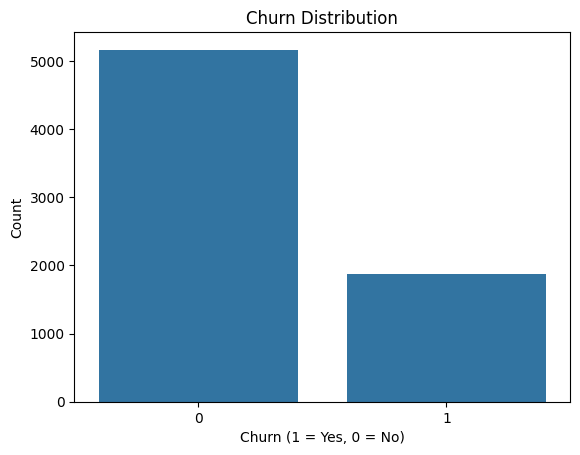

In [2]:
# eda_preprocess.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/telco_churn.csv")
print("Initial shape:", df.shape)

# Drop customerID column
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Convert binary columns to 0/1
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-hot encode the remaining categorical variables
df = pd.get_dummies(df, drop_first=True)

print("Final shape after encoding:", df.shape)

# Save the cleaned dataset
df.to_csv("../data/processed_churn.csv", index=False)

# Plot churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()
